In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

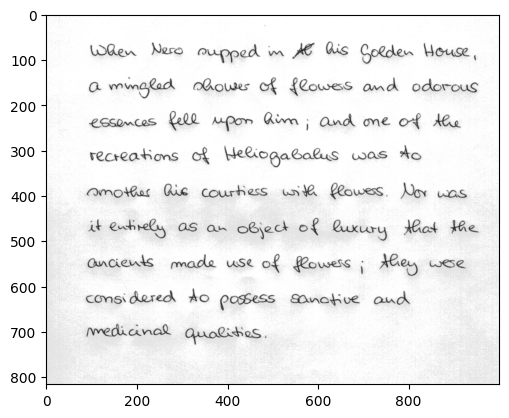

In [63]:
img = cv2.imread('handwrittenImgs-Samples/sample2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img)

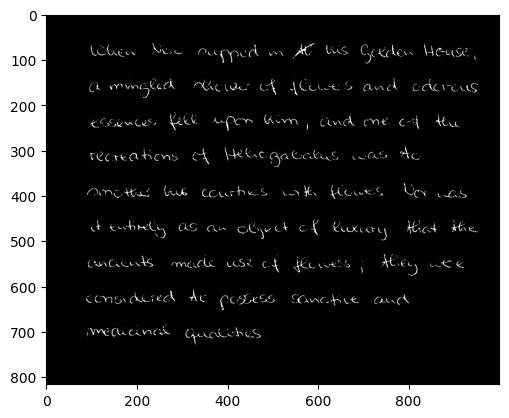

In [57]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

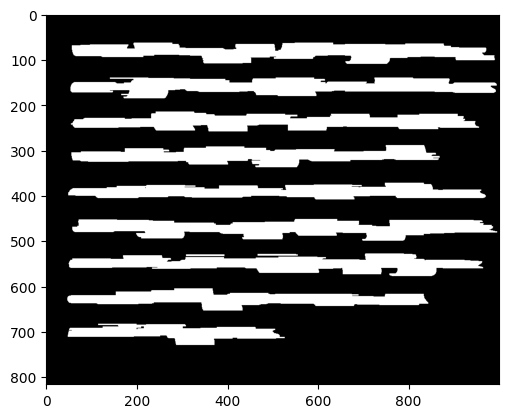

In [58]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [59]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

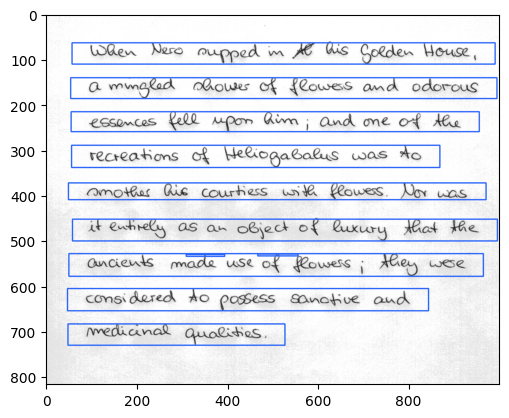

In [60]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);

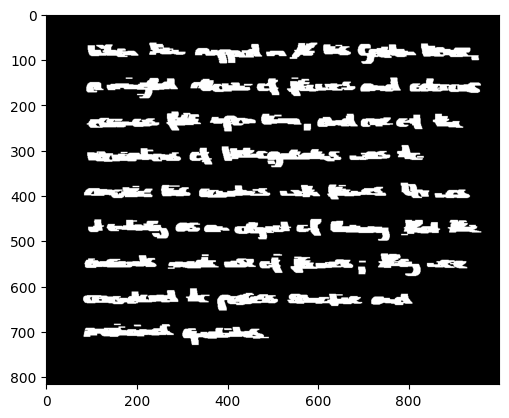

In [61]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

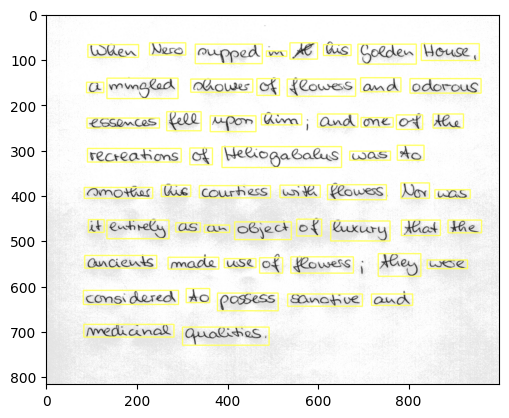

In [62]:
def delete_existing_images(directory):
    """Deletes all images within a directory."""
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

img3 = img.copy()
words_list = []

# Create a single directory for all extracted word images (modify 'words' if needed)
words_dir = "words"

# Delete existing images if the directory exists
if os.path.exists(words_dir):
    delete_existing_images(words_dir)
os.makedirs(words_dir, exist_ok=True)  # Create directory if it doesn't exist

line_number = 0  # Track line number for filenames

for line in sorted_contours_lines:

    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+h, x:x+w]

    # Draw contours on each word and sort within the line
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr: cv2.boundingRect(cntr)[0])

    word_number = 0  # Track word number within the line

    for word in sorted_contour_words:

        if cv2.contourArea(word) < 400:
            continue

        x2, y2, w2, h2 = cv2.boundingRect(word)
        word_roi = img[y+y2:y+y2+h2, x+x2:x+x2+w2]

        # Create filename with correct line and word number
        filename = f"{words_dir}/line_{line_number}_word_{word_number}.jpg"
        cv2.imwrite(filename, word_roi)  # Save the word image

        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)

        word_number += 1  # Increment word number

    line_number += 1  # Increment line number

plt.imshow(img3);
